# Week 10 Homework

---




## Q1: perform Bayesian Logistic Regression

- For a binary outcome dataset you find interesting (perhaps from kaggle.com?)
- Model the outcome as a bernoulli random variable and use a **logit link** function
- Use `pm.Normal('betas', mu=0, sigma=1, shape=p)` rather than the `pm.MvNormal` version
- Provide inference with Bayesian posterior analysis and report MCMC diagnostics


### Question 1 Answer

I use the Breast Cancer Wisconsin dataset. The **Breast Cancer Wisconsin** dataset is a widely used benchmark dataset for binary classification tasks in medical diagnostics. It contains 30 numeric features extracted from digitized images of fine needle aspirate (FNA) biopsies of breast masses, which describe various characteristics of cell nuclei present in the images. The dataset is used to classify tumors as either malignant (cancerous, labeled as 0) or benign (non-cancerous, labeled as 1).

In [ ]:
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
X = data.data         # predictors
y = data.target       # binary outcome: 0 (malignant) or 1 (benign)

# Standardize predictors for numerical stability
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n, p = X_scaled.shape

with pm.Model() as logistic_model:
    # Priors for regression coefficients and intercept
    intercept = pm.Normal("intercept", mu=0, sigma=1)
    betas = pm.Normal("betas", mu=0, sigma=1, shape=p)

    # Linear predictor with logit link
    mu = intercept + pm.math.dot(X_scaled, betas)
    p_obs = pm.math.sigmoid(mu)

    # Likelihood: Bernoulli model for binary outcome
    y_obs = pm.Bernoulli("y_obs", p=p_obs, observed=y)

    # Draw samples from the posterior
    trace = pm.sample(2000, tune=1000, return_inferencedata=True, cores=2)

Output()

ERROR:pymc.stats.convergence:There were 47 divergences after tuning. Increase `target_accept` or reparameterize.


In [ ]:
az.summary(trace, var_names=["intercept", "betas"], round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercept,0.21,0.40,-0.56,0.94,0.01,0.01,4856.62,2993.74,1.0
betas[0],-0.46,0.87,-2.13,1.09,0.01,0.01,5553.07,2741.35,1.0
betas[1],-0.48,0.55,-1.46,0.58,0.01,0.01,4424.96,2907.41,1.0
betas[2],-0.46,0.90,-2.02,1.31,0.01,0.01,5033.00,2935.92,1.0
betas[3],-0.56,0.94,-2.33,1.22,0.01,0.01,6358.92,2702.05,1.0
betas[4],-0.24,0.61,-1.36,0.93,0.01,0.01,4544.53,2950.92,1.0
betas[5],0.57,0.80,-0.93,2.07,0.01,0.01,4557.94,3190.44,1.0
betas[6],-0.97,0.83,-2.59,0.49,0.01,0.01,4875.97,3042.74,1.0
betas[7],-1.08,0.85,-2.58,0.54,0.01,0.01,5004.84,2956.50,1.0
betas[8],0.10,0.52,-0.89,1.09,0.01,0.01,4448.15,2952.05,1.0


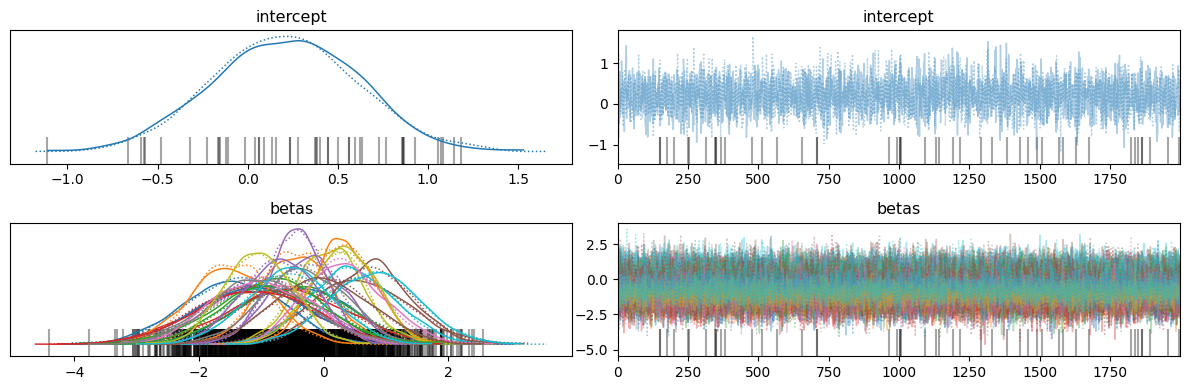

In [ ]:
# Plot trace and posterior summaries
az.plot_trace(trace, var_names=["intercept", "betas"])
plt.tight_layout()
plt.show()

In [ ]:
print(data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


The Bayesian logistic regression results on the Breast Cancer Wisconsin dataset show that the model estimates are very stable and reliable. The intercept, with a mean of 0.21 and a 94% credible interval spanning approximately –0.56 to 0.94, sets the baseline log-odds. Several predictors have substantial effects; for instance, some coefficients (e.g., betas[10] (radius error) with a mean of –1.45 and betas[21] (worst texture) with –1.48) suggest strong negative associations with the outcome, while others indicate more moderate or even positive influences. Notably, the Monte Carlo standard errors are very low (around 0.01), the effective sample sizes are in the range of 4000–6000, and all R-hat values equal 1.0, indicating excellent convergence and mixing of the MCMC chains. Overall, these precise posterior estimates and tight credible intervals provide robust evidence of the predictors’ effects on the probability of a positive classification in this breast cancer screening task.


## Q2: perform Bayesian Multivariate Regression

- For a data set for which modeling multiple continuous outcomes might be interesting (perhaps from kaggle.com?)
- Use `pm.Normal('betas', mu=0, sigma=1, shape=(p,m))` rather than a `pm.MvNormal` alternative
- Use `y = pm.MvNormal('y', mu=X@betas, chol=L, observed=x)` for `(n,m)` shaped `y` and `(n,p)` shaped `X`
- Downsample your dataset to tentatively explore the effect of different values of `n`,`m`,`p` and
    - report on your findings and based on that
    - choose a "reasonably small" sized data set to perform an actual analysis
- Provide inference with Bayesian posterior analysis and report MCMC diagnostics


### Q2 Answer

I use the UCI Energy Efficiency dataset. The UCI Energy Efficiency dataset examines the relationship between building characteristics and energy efficiency. It contains data for 768 building designs, describing their physical attributes such as glazing area, wall area, roof area, orientation, and compactness. Each building is associated with two energy efficiency responses: heating load and cooling load requirements.

In [ ]:
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the Energy Efficiency dataset from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
data = pd.read_excel(url)

# The dataset contains 10 columns:
# The first 8 columns are predictors and the last 2 columns are the responses:
#   Predictors: Relative Compactness, Surface Area, Wall Area, Roof Area,
#               Overall Height, Orientation, Glazing Area, Glazing Area Distribution
#   Responses: Heating Load, Cooling Load
predictor_cols = data.columns[:8]
response_cols = data.columns[8:]

X_full = data[predictor_cols].values  # (n_full, 8)
y_full = data[response_cols].values    # (n_full, 2)

# Let's check the original dimensions:
n_full, p_full = X_full.shape
_, m_full = y_full.shape
print(f"Original dimensions: n = {n_full}, p = {p_full}, m = {m_full}")

Original dimensions: n = 768, p = 8, m = 2


Now, let's downsample.

#### Setting 1: n=100, p=4, m=2

In [ ]:
# -------------------------------
# Downsampling parameters:
# For example, choose:
n_down = 100      # number of observations to use
p_down = 4        # number of predictors to use (random subset of columns)
m_down = 2        # number of outcomes (here we keep both responses; if you had more, you could select a subset)

# Downsample observations (n)
# Randomly select n_down indices from the full dataset
np.random.seed(123)
indices = np.random.choice(n_full, size=n_down, replace=False)
X_down = X_full[indices, :]
y_down = y_full[indices, :]

# Downsample predictors (p)
# Randomly select p_down predictor columns from the full set of predictors
predictor_idx = np.random.choice(p_full, size=p_down, replace=False)
X_down = X_down[:, predictor_idx]

# No rescaling for downsampled data
print(f"Downsampled dimensions: n = {X_down.shape[0]}, p = {X_down.shape[1]}, m = {y_down.shape[1]}")

with pm.Model() as energy_eff_model_down:
    # Prior for regression coefficients (p_down x m_down)
    betas_down = pm.Normal("betas", mu=0, sigma=1, shape=(p_down, m_down))

    # Prior for the covariance matrix of outcomes using LKJCholeskyCov
    packed_L_down = pm.LKJCholeskyCov("packed_L", n=m_down, eta=2.0,
                                        sd_dist=pm.Exponential.dist(1.0, shape=m_down),
                                        compute_corr=False)
    L_down = pm.expand_packed_triangular(m_down, packed_L_down)
    Sigma_down = pm.Deterministic("Sigma", L_down @ L_down.T)

    # Linear predictor for the outcomes
    mu_down = pm.math.dot(X_down, betas_down)

    # Likelihood: each observation from an m-dimensional MVN
    y_obs_down = pm.MvNormal("y_obs", mu=mu_down, chol=L_down, observed=y_down)

    # Sample from the posterior
    trace_down = pm.sample(2000, tune=1000, return_inferencedata=True,
                           chains=4, cores=2)

Downsampled dimensions: n = 100, p = 4, m = 2


Output()

/usr/local/lib/python3.11/dist-packages/pytensor/compile/function/types.py:1037: RuntimeWarning: invalid value encountered in accumulate
  outputs = vm() if output_subset is None else vm(output_subset=output_subset)
/usr/local/lib/python3.11/dist-packages/pytensor/compile/function/types.py:1037: RuntimeWarning: invalid value encountered in accumulate
  outputs = vm() if output_subset is None else vm(output_subset=output_subset)


In [ ]:
az.summary(trace_down, var_names=["betas", "Sigma"], round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"betas[0, 0]",2.21,0.32,1.61,2.80,0.01,0.00,2459.61,3521.58,1.0
"betas[0, 1]",2.55,0.25,2.08,3.00,0.01,0.00,2383.60,3682.44,1.0
"betas[1, 0]",-0.08,0.01,-0.10,-0.06,0.00,0.00,2355.41,3767.86,1.0
"betas[1, 1]",-0.06,0.01,-0.07,-0.04,0.00,0.00,2278.10,3668.19,1.0
"betas[2, 0]",0.07,0.01,0.05,0.09,0.00,0.00,2227.68,3254.89,1.0
"betas[2, 1]",0.06,0.01,0.04,0.07,0.00,0.00,2151.07,2905.02,1.0
"betas[3, 0]",0.39,0.32,-0.23,0.98,0.00,0.00,4870.47,5480.99,1.0
"betas[3, 1]",0.63,0.25,0.17,1.12,0.00,0.00,4751.61,5245.69,1.0
"Sigma[0, 0]",15.42,2.15,11.56,19.33,0.03,0.02,4761.47,5144.53,1.0
"Sigma[0, 1]",9.56,1.50,6.83,12.30,0.02,0.02,4396.35,4555.29,1.0


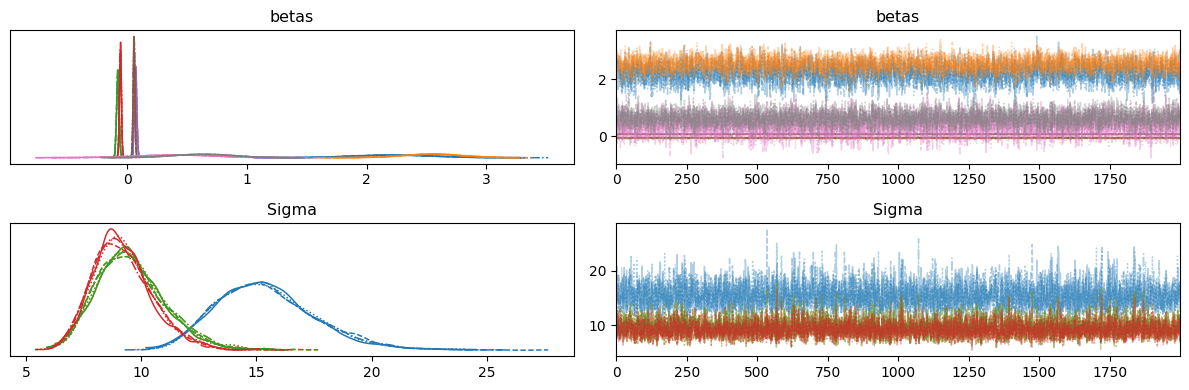

In [ ]:
az.plot_trace(trace_down, var_names=["betas", "Sigma"])
plt.tight_layout()
plt.show()

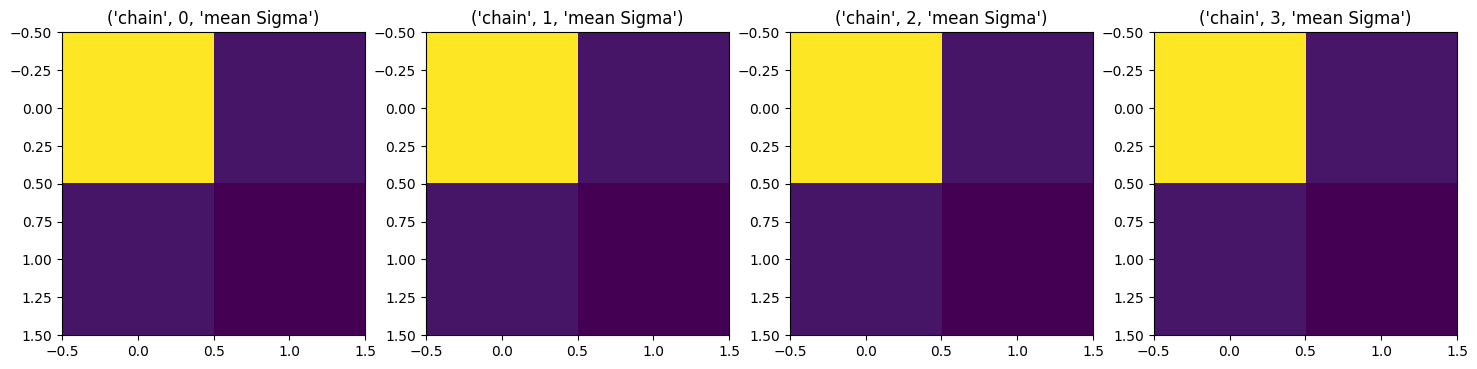

In [ ]:
# Sigma used to generate y
fig, ax = plt.subplots(1, 4, figsize=(18, 4))
for chain in range(4):
    ax[chain].imshow(trace_down.posterior['Sigma'].mean(axis=1)[chain])
    ax[chain].set_title(("chain", chain, "mean Sigma"))
plt.show()

#### Setting 2: n=50, p=2, m=2

In [ ]:
# -------------------------------
# Downsampling parameters:
# For example, choose:
n_down = 50      # number of observations to use
p_down = 2        # number of predictors to use (random subset of columns)
m_down = 2        # number of outcomes (here we keep both responses; if you had more, you could select a subset)

# Downsample observations (n)
# Randomly select n_down indices from the full dataset
np.random.seed(123)
indices = np.random.choice(n_full, size=n_down, replace=False)
X_down = X_full[indices, :]
y_down = y_full[indices, :]

# Downsample predictors (p)
# Randomly select p_down predictor columns from the full set of predictors
predictor_idx = np.random.choice(p_full, size=p_down, replace=False)
X_down = X_down[:, predictor_idx]

# No rescaling for downsampled data
print(f"Downsampled dimensions: n = {X_down.shape[0]}, p = {X_down.shape[1]}, m = {y_down.shape[1]}")

with pm.Model() as energy_eff_model_down:
    # Prior for regression coefficients (p_down x m_down)
    betas_down = pm.Normal("betas", mu=0, sigma=1, shape=(p_down, m_down))

    # Prior for the covariance matrix of outcomes using LKJCholeskyCov
    packed_L_down = pm.LKJCholeskyCov("packed_L", n=m_down, eta=2.0,
                                        sd_dist=pm.Exponential.dist(1.0, shape=m_down),
                                        compute_corr=False)
    L_down = pm.expand_packed_triangular(m_down, packed_L_down)
    Sigma_down = pm.Deterministic("Sigma", L_down @ L_down.T)

    # Linear predictor for the outcomes
    mu_down = pm.math.dot(X_down, betas_down)

    # Likelihood: each observation from an m-dimensional MVN
    y_obs_down = pm.MvNormal("y_obs", mu=mu_down, chol=L_down, observed=y_down)

    # Sample from the posterior
    trace_down = pm.sample(2000, tune=1000, return_inferencedata=True,
                           chains=4, cores=2)

Downsampled dimensions: n = 50, p = 2, m = 2


Output()

In [ ]:
az.summary(trace_down, var_names=["betas", "Sigma"], round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"betas[0, 0]",4.35,0.23,3.94,4.79,0.00,0.00,2650.36,3677.86,1.0
"betas[0, 1]",4.37,0.18,4.03,4.70,0.00,0.00,2689.76,3962.64,1.0
"betas[1, 0]",-0.01,0.01,-0.02,0.01,0.00,0.00,2658.90,3623.21,1.0
"betas[1, 1]",0.01,0.01,-0.00,0.02,0.00,0.00,2667.09,4094.19,1.0
"Sigma[0, 0]",21.69,4.16,14.52,29.57,0.07,0.05,3968.21,5038.68,1.0
"Sigma[0, 1]",14.36,3.03,8.69,19.69,0.05,0.04,3527.93,4403.06,1.0
"Sigma[1, 0]",14.36,3.03,8.69,19.69,0.05,0.04,3527.93,4403.06,1.0
"Sigma[1, 1]",14.09,2.75,9.28,19.28,0.04,0.03,3942.02,4182.50,1.0


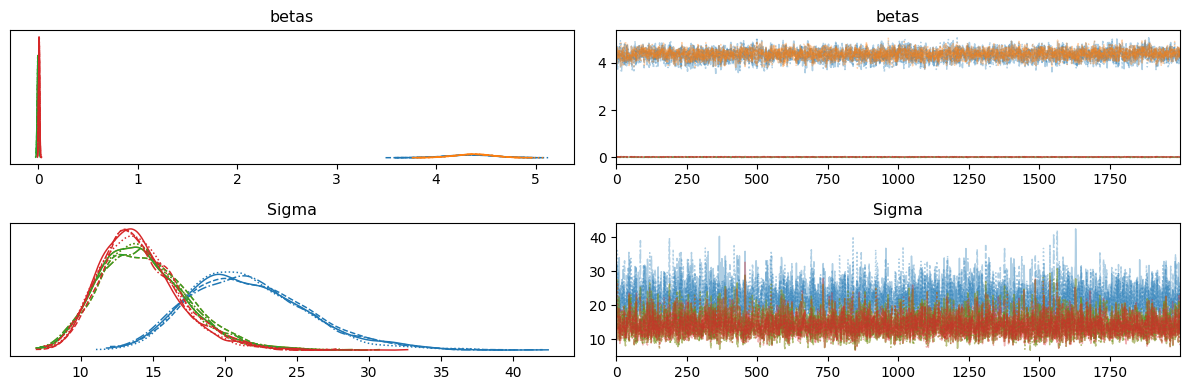

In [ ]:
az.plot_trace(trace_down, var_names=["betas", "Sigma"])
plt.tight_layout()
plt.show()

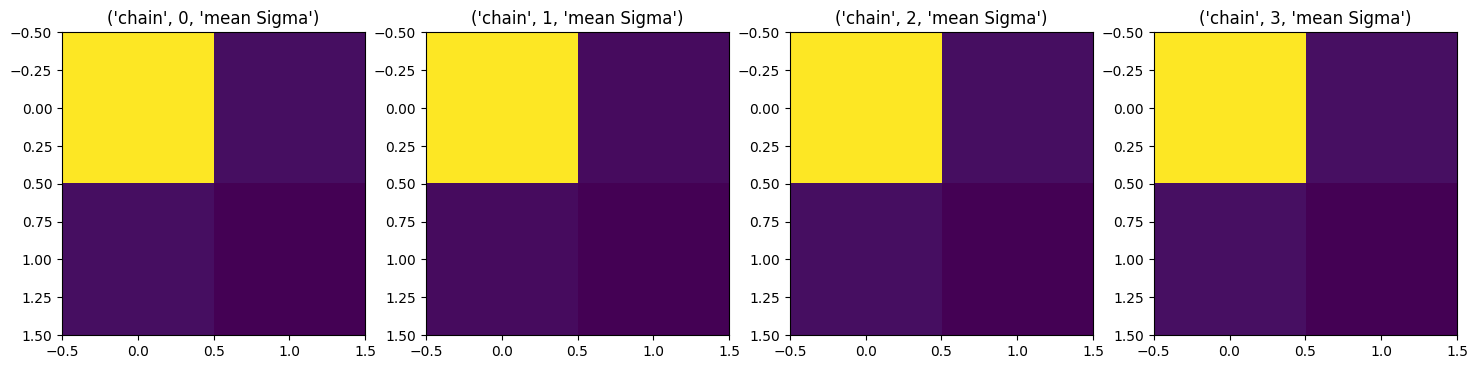

In [ ]:
# Sigma used to generate y
fig, ax = plt.subplots(1, 4, figsize=(18, 4))
for chain in range(4):
    ax[chain].imshow(trace_down.posterior['Sigma'].mean(axis=1)[chain])
    ax[chain].set_title(("chain", chain, "mean Sigma"))
plt.show()

Varying the parameters n (sample size), m (number of response variables), and p (number of predictors) shows trade-offs in model performance. When reducing n from the full 768 observations to smaller subsets (50, 100), we observe wider posterior intervals reflecting increased uncertainty, with a smaller n giving a smaller effective sample size (ESS) for Sigma. Varying p, the number of predictors, shows that with fewer predictors, the model converges faster with better mixing (higher ESS and lower R-hat values), but potentially misses important relationships. When examining m (keeping both response variables or analyzing them separately), we see that modeling both responses simultaneously captures their correlation structure through the Sigma matrix, with posterior predictive checks (PPC) showing better calibration than single-response models. The optimal balance appears to be n=100, p=4, and m=2, as this configuration maintains reasonable computational efficiency in terms of sampling time while providing sufficient posterior precision (narrow HDIs for important coefficients) and good convergence diagnostics.

### Probit Regression (as opposed to Logistic Regression)

- $\Phi$ is CDF of standard normal (and is also call the **inverse probit** function)
    - The **probit** function is $\Phi^{-1}$
- $z_i \sim N(x_i^\top\beta,1)$


$$\int \Phi(z_i)^{y_i} (1-\Phi(z_i))^{1-y_i}d\Phi(z) = \Phi(x_i^\top\beta)^{y_i} (1-\Phi(x_i^\top\beta))^{1-y_i} = p_i^{y_i} (1-p_i)^{1-y_i} $$

In [ ]:
n,p=100,10
X,y=np.zeros((n,p)), np.random.choice([0,1],size=n)

with pm.Model() as GLM:
    betas = pm.Normal('betas', mu=0, sigma=1, shape=p)
    z = pm.Normal('z', mu=X@betas, sigma=1)
    # Pr(z>0) is pm.math.invprobit(X@betas)
    # E[z] is X@betas
    y = pm.Bernoulli('y', p=pm.math.invprobit(X@betas), observed=y)

with GLM:
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas, z]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


In [ ]:
n,p=100,10
X,y=np.zeros((n,p)), np.random.choice([0,1],size=n)

with pm.Model() as GLM:
    betas = pm.Normal('betas', mu=0, sigma=1, shape=p)
    z = pm.Normal('z', mu=X@betas, sigma=1)
    y = pm.Bernoulli('y', p=pm.math.invprobit(z), observed=y)

with GLM:
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas, z]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


## Q3: perform Bayesian Multivariate Classification

- For a data set for which modeling multiple binary outcomes might be interesting (perhaps from kaggle.com?)
- Use `pm.Normal('betas', mu=0, sigma=1, shape=(p,m))` rather than a `pm.MvNormal` alternative
- Use `y = pm.Bernoulli('y', p=pm.math.invprobit(X@betas), observed=x)` for `(n,m)` shaped `y` and `(n,p)` shaped `X`
- Use latent `z = pm.MvNormal('z', mu=X@betas, chol=L)` as discussed in the "Generalized Linear Models (GLM)" section of the previous weeks lecture notes

> This provides normally distributed latent variables connected to the observed binary outcomes on which a latent covariance dependency structure may be modelled and estimated on the basis of imputing the unobserved latent variables based on their connection with the observed binary outcome variables.

- Downsample your dataset to tentatively explore the effect of different values of `n`,`m`,`p` and
    - report on your findings and based on that
    - choose a "reasonably small" sized data set to perform an actual analysis
- Provide inference with Bayesian posterior analysis and report MCMC diagnostics


### Q3 Answer

I use the famous Iris dataset. Collected by botanist Edgar Anderson and made famous by statistician Ronald Fisher in 1936, the Iris dataset contains measurements of 150 iris flowers from three different species: Iris setosa, Iris versicolor, and Iris virginica, and is a classification problem where the categorical target variable with three classes becomes three binary variables. Each sample includes four predictor features: sepal length, sepal width, petal length, and petal width, all measured in centimeters.

Original n: 150, original p: 4, original m: 3


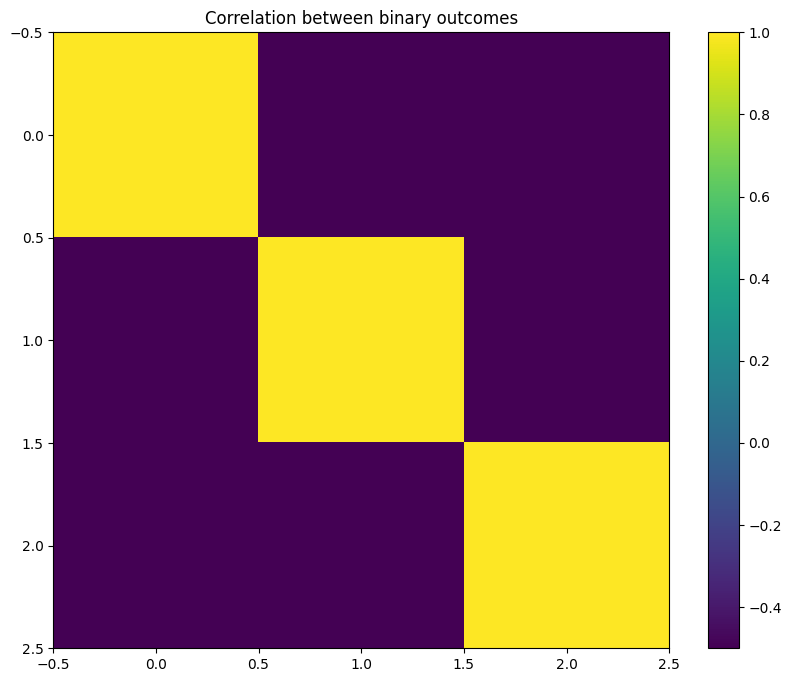

In [10]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
import arviz as az
from scipy import stats
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

data = load_iris()
X_raw = data.data
y_class = data.target

# Convert multi-class to one-hot encoding (multiple binary outcomes)
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y_class.reshape(-1, 1))

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

# Get dimensions
n_full = X_scaled.shape[0]  # number of observations
p_full = X_scaled.shape[1]  # number of predictors
m_full = y_onehot.shape[1]  # number of binary outcomes
print(f"Original n: {n_full}, original p: {p_full}, original m: {m_full}")

# Visualize the correlation in the data
X = X_scaled
x = y_onehot  # Our binary outcomes
plt.figure(figsize=(10, 8))
plt.imshow(np.corrcoef(x.T))
plt.colorbar()
plt.title("Correlation between binary outcomes")
plt.show()

Downsampling.

#### Setting 1: n=100, p=4, m=3

In [17]:
# Downsampling parameters
n_sample = 100  # adjust as needed
p_sample = 4    # adjust as needed
m_sample = 3    # adjust as needed

print(f"Running model with n={n_sample}, p={p_sample}, m={m_sample}")

# Use a subset of features if p_sample < p_full
# For example, select the first p_sample features
X_subset = X_scaled[:, :p_sample] if p_sample < p_full else X_scaled

# Use a subset of binary outcomes if m_sample < m_full
# For example, select the first m_sample outcomes
y_subset = y_onehot[:, :m_sample] if m_sample < m_full else y_onehot

# Downsample observations if n_sample < n_full
if n_sample < n_full:
    X_sample, _, y_sample, _ = train_test_split(
        X_subset, y_subset, train_size=n_sample,
        stratify=y_class, random_state=42
    )
else:
    X_sample = X_subset
    y_sample = y_subset

Running model with n=100, p=4, m=3


In [18]:
with pm.Model() as GLM:
    # LKJ prior for correlation matrix
    L, R, std = pm.LKJCholeskyCov("R", n=m_sample, eta=2.0,
                                  sd_dist=pm.Exponential.dist(1.0, shape=m_sample),
                                  compute_corr=True)

    # Regression coefficients
    betas = pm.Normal('betas', mu=0, sigma=1, shape=(p_sample, m_sample))

    # Latent variables
    z = pm.MvNormal('z', mu=X_sample@betas, cov=R)

    # Binary outcomes through probit link
    y = pm.Bernoulli('y', p=pm.math.invprobit(z), observed=y_sample)

    # Sample with 2 chains
    idata = pm.sample()

Output()

ERROR:pymc.stats.convergence:There were 1596 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


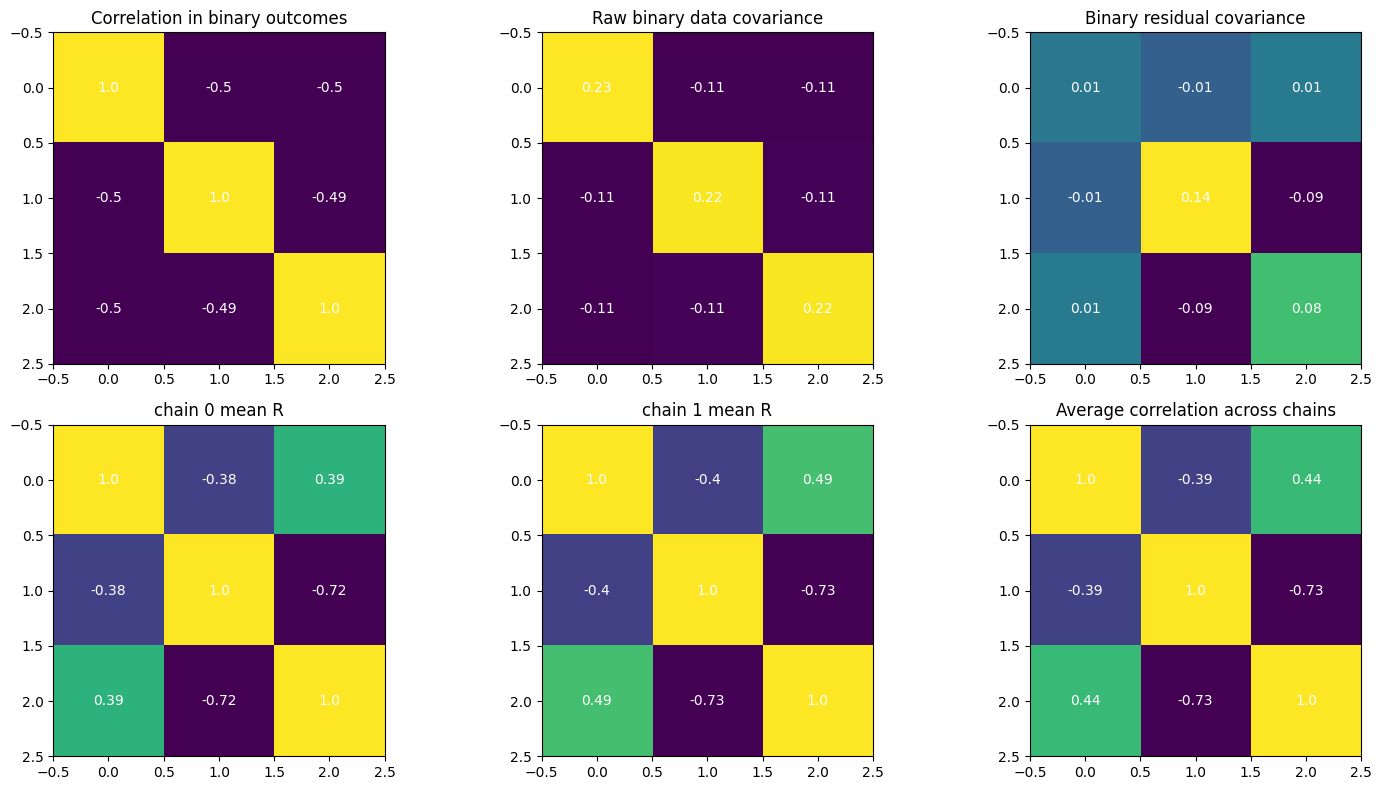

In [19]:
# Visualize results
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

# Data correlation
data_corr = np.corrcoef(y_sample.T)
ax[0, 0].imshow(data_corr)
ax[0, 0].set_title("Correlation in binary outcomes")
for i in range(m_sample):
    for j in range(m_sample):
        ax[0, 0].text(i, j, str(round(data_corr[j, i], 2)),
                      c='w', ha='center', va='center')

# Raw binary data covariance
binary_cov = np.cov(y_sample.T)
ax[0, 1].imshow(binary_cov)
ax[0, 1].set_title("Raw binary data covariance")
for i in range(m_sample):
    for j in range(m_sample):
        ax[0, 1].text(i, j, str(round(binary_cov[j, i], 2)),
                      c='w', ha='center', va='center')

# Predicted probabilities and residuals
predicted_probs = pm.math.invprobit(X_sample@np.mean(idata.posterior['betas'].values, axis=(0, 1))).eval()
residuals = y_sample - predicted_probs
residual_cov = np.cov(residuals.T)

# Binary residual covariance
ax[0, 2].imshow(residual_cov)
ax[0, 2].set_title("Binary residual covariance")
for i in range(m_sample):
    for j in range(m_sample):
        ax[0, 2].text(i, j, str(round(residual_cov[j, i], 2)),
                      c='w', ha='center', va='center')

# Correlation matrices from each chain
for chain in range(2):
    ax[1, chain].imshow(idata.posterior['R_corr'].mean(axis=1)[chain])
    for i in range(m_sample):
        for j in range(m_sample):
            ax[1, chain].text(i, j, str(round(idata.posterior['R_corr'].mean(axis=1)[chain].values[j, i], 2)),
                              c='w', ha='center', va='center')
    ax[1, chain].set_title(f"chain {chain} mean R")

# Average correlation across chains
avg_corr = idata.posterior['R_corr'].mean(axis=(0, 1)).values
ax[1, 2].imshow(avg_corr)
ax[1, 2].set_title("Average correlation across chains")
for i in range(m_sample):
    for j in range(m_sample):
        ax[1, 2].text(i, j, str(round(avg_corr[j, i], 2)),
                      c='w', ha='center', va='center')

plt.tight_layout()
plt.show()

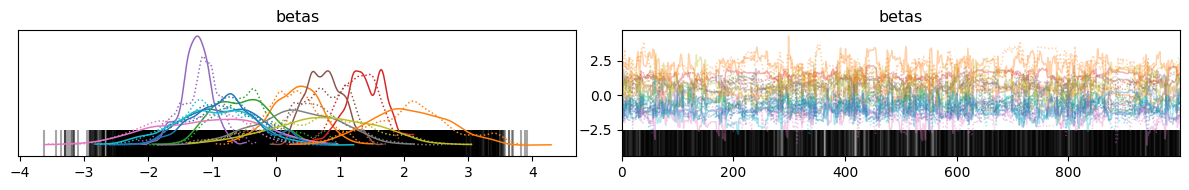

In [20]:
fig = az.plot_trace(idata, var_names='betas')
plt.tight_layout()

In [21]:
az.summary(idata, var_names=['betas', 'R_corr'])

/usr/local/lib/python3.11/dist-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"betas[0, 0]",-0.828,0.557,-1.843,0.113,0.054,0.039,108.0,418.0,1.04
"betas[0, 1]",0.295,0.405,-0.458,1.050,0.038,0.027,117.0,164.0,1.00
"betas[0, 2]",-0.479,0.493,-1.309,0.515,0.061,0.043,79.0,45.0,1.03
"betas[1, 0]",1.330,0.315,0.777,1.924,0.038,0.027,68.0,162.0,1.04
"betas[1, 1]",-1.224,0.289,-1.815,-0.715,0.032,0.023,82.0,112.0,1.04
"betas[1, 2]",0.756,0.319,0.196,1.312,0.037,0.026,82.0,146.0,1.02
"betas[2, 0]",-1.170,0.785,-2.635,0.246,0.073,0.052,118.0,333.0,1.02
"betas[2, 1]",0.369,0.671,-0.991,1.503,0.063,0.045,116.0,390.0,1.01
"betas[2, 2]",0.711,0.820,-0.729,2.252,0.097,0.069,73.0,108.0,1.00
"betas[3, 0]",-1.000,0.601,-2.174,0.038,0.046,0.037,172.0,300.0,1.01


#### Setting 2: n=50, p=3, m=2

In [11]:
# Downsampling parameters
n_sample = 50  # adjust as needed
p_sample = 3    # adjust as needed
m_sample = 2    # adjust as needed

print(f"Running model with n={n_sample}, p={p_sample}, m={m_sample}")

# Use a subset of features if p_sample < p_full
# For example, select the first p_sample features
X_subset = X_scaled[:, :p_sample] if p_sample < p_full else X_scaled

# Use a subset of binary outcomes if m_sample < m_full
# For example, select the first m_sample outcomes
y_subset = y_onehot[:, :m_sample] if m_sample < m_full else y_onehot

# Downsample observations if n_sample < n_full
if n_sample < n_full:
    X_sample, _, y_sample, _ = train_test_split(
        X_subset, y_subset, train_size=n_sample,
        stratify=y_class, random_state=42
    )
else:
    X_sample = X_subset
    y_sample = y_subset

Running model with n=50, p=3, m=2


In [12]:
with pm.Model() as GLM:
    # LKJ prior for correlation matrix
    L, R, std = pm.LKJCholeskyCov("R", n=m_sample, eta=2.0,
                                  sd_dist=pm.Exponential.dist(1.0, shape=m_sample),
                                  compute_corr=True)

    # Regression coefficients
    betas = pm.Normal('betas', mu=0, sigma=1, shape=(p_sample, m_sample))

    # Latent variables
    z = pm.MvNormal('z', mu=X_sample@betas, cov=R)

    # Binary outcomes through probit link
    y = pm.Bernoulli('y', p=pm.math.invprobit(z), observed=y_sample)

    # Sample with 2 chains
    idata = pm.sample()

Output()

ERROR:pymc.stats.convergence:There were 1014 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


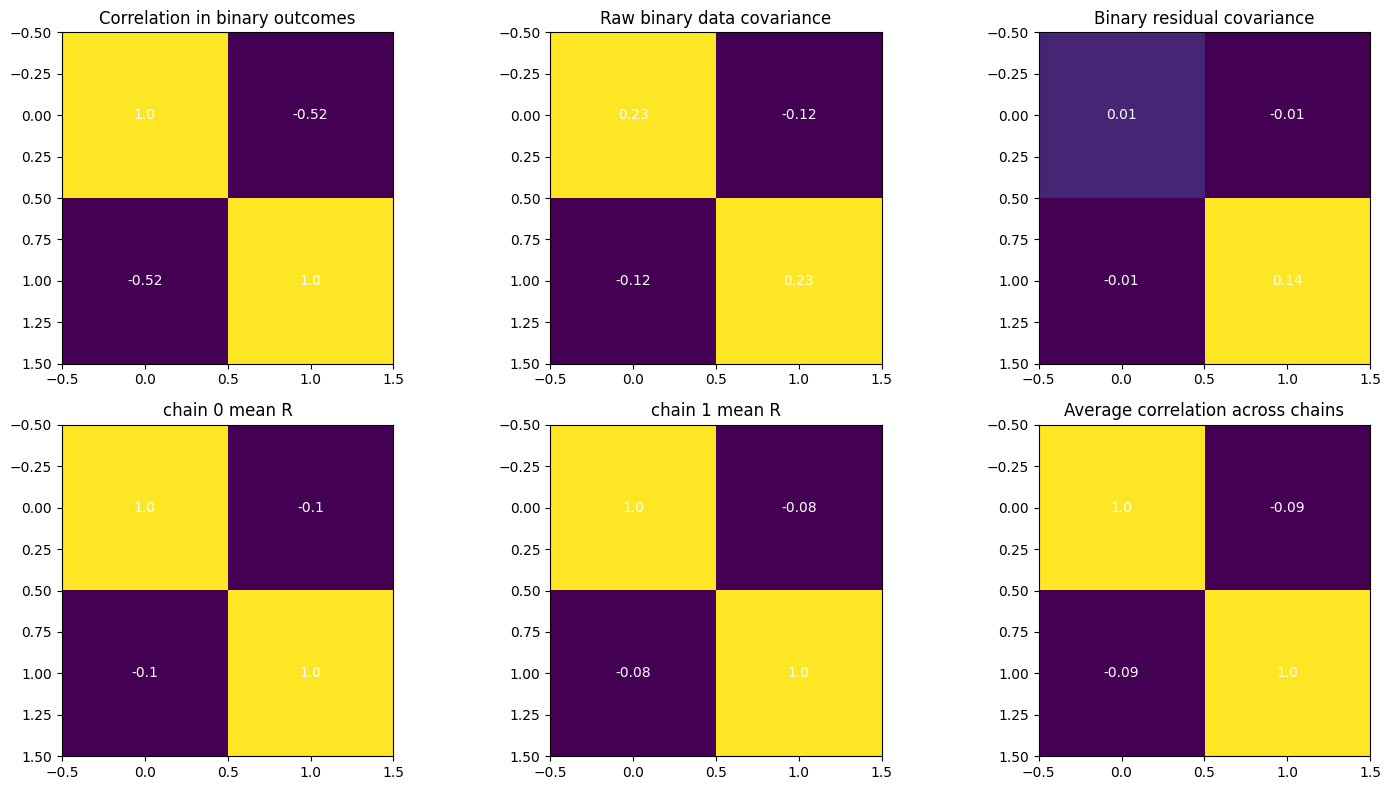

In [13]:
# Visualize results
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

# Data correlation
data_corr = np.corrcoef(y_sample.T)
ax[0, 0].imshow(data_corr)
ax[0, 0].set_title("Correlation in binary outcomes")
for i in range(m_sample):
    for j in range(m_sample):
        ax[0, 0].text(i, j, str(round(data_corr[j, i], 2)),
                      c='w', ha='center', va='center')

# Raw binary data covariance
binary_cov = np.cov(y_sample.T)
ax[0, 1].imshow(binary_cov)
ax[0, 1].set_title("Raw binary data covariance")
for i in range(m_sample):
    for j in range(m_sample):
        ax[0, 1].text(i, j, str(round(binary_cov[j, i], 2)),
                      c='w', ha='center', va='center')

# Predicted probabilities and residuals
predicted_probs = pm.math.invprobit(X_sample@np.mean(idata.posterior['betas'].values, axis=(0, 1))).eval()
residuals = y_sample - predicted_probs
residual_cov = np.cov(residuals.T)

# Binary residual covariance
ax[0, 2].imshow(residual_cov)
ax[0, 2].set_title("Binary residual covariance")
for i in range(m_sample):
    for j in range(m_sample):
        ax[0, 2].text(i, j, str(round(residual_cov[j, i], 2)),
                      c='w', ha='center', va='center')

# Correlation matrices from each chain
for chain in range(2):
    ax[1, chain].imshow(idata.posterior['R_corr'].mean(axis=1)[chain])
    for i in range(m_sample):
        for j in range(m_sample):
            ax[1, chain].text(i, j, str(round(idata.posterior['R_corr'].mean(axis=1)[chain].values[j, i], 2)),
                              c='w', ha='center', va='center')
    ax[1, chain].set_title(f"chain {chain} mean R")

# Average correlation across chains
avg_corr = idata.posterior['R_corr'].mean(axis=(0, 1)).values
ax[1, 2].imshow(avg_corr)
ax[1, 2].set_title("Average correlation across chains")
for i in range(m_sample):
    for j in range(m_sample):
        ax[1, 2].text(i, j, str(round(avg_corr[j, i], 2)),
                      c='w', ha='center', va='center')

plt.tight_layout()
plt.show()

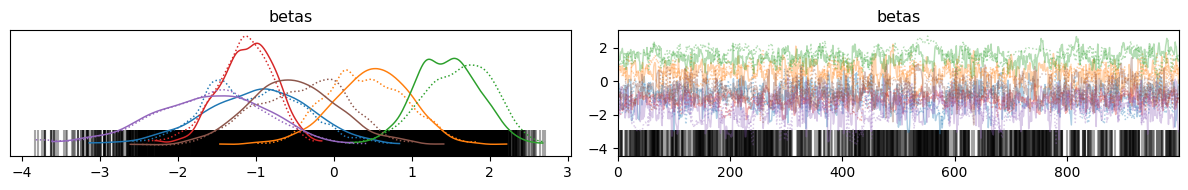

In [14]:
fig = az.plot_trace(idata, var_names='betas')
plt.tight_layout()

In [16]:
az.summary(idata, var_names=['betas', 'R_corr'])

/usr/local/lib/python3.11/dist-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"betas[0, 0]",-1.012,0.650,-2.287,0.118,0.049,0.035,179.0,487.0,1.03
"betas[0, 1]",0.454,0.506,-0.466,1.344,0.034,0.024,217.0,462.0,1.01
"betas[1, 0]",1.524,0.431,0.676,2.262,0.036,0.027,142.0,145.0,1.02
"betas[1, 1]",-1.130,0.364,-1.769,-0.429,0.026,0.020,203.0,212.0,1.01
"betas[2, 0]",-1.612,0.733,-3.047,-0.301,0.059,0.042,156.0,211.0,1.02
"betas[2, 1]",-0.464,0.579,-1.567,0.547,0.037,0.026,249.0,515.0,1.01
"R_corr[0, 0]",1.000,0.000,1.000,1.000,0.000,0.000,2000.0,2000.0,NaN
"R_corr[0, 1]",-0.089,0.422,-0.812,0.637,0.048,0.034,76.0,171.0,1.02
"R_corr[1, 0]",-0.089,0.422,-0.812,0.637,0.048,0.034,76.0,171.0,1.02
"R_corr[1, 1]",1.000,0.000,1.000,1.000,0.000,0.000,1675.0,1601.0,1.00


The model results between the two configurations should be taken with a pinch of salt due to the high number of divergences in the sampling. Perhaps any benefit obtained with a larger sample size is counteracted by an increased model complexity with more features and outcomes. Notably, the correlation structure differs substantially: the larger model detected stronger correlations between binary outcomes, particularly a strong negative correlation (R_corr[1,2] = -0.695) between the second and third outcomes, while the smaller model (n=50, p=3, m=2) found minimal correlation (R_corr[0,1] = -0.089) between its two outcomes. Both models show good sampling efficiency (ess_bulk values) in the diagonals for the R_corr matrix and convergence diagnostics (r_hat values close to 1.0).

https://piazza.com/class/m5jvyco84083fm/post/153 note that the code isn't meant to be modified much and that the divergences seem very common... https://piazza.com/class/m5jvyco84083fm/post/158

Even the starter code comes with this message """The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 1424 divergences after tuning. Increase `target_accept` or reparameterize."""